In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from ckine.simulation_plotting import solve_IL2_IL15

Text(0.5, 1.0, 'Non-additive effects between IL2/15 in YT-1 cells (1nM)')

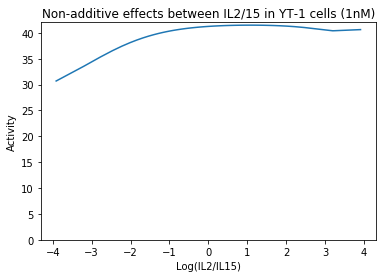

In [6]:
y,num, xaxis = solve_IL2_IL15(1.0, 50, 500.0)
f, ax = plt.subplots()
ax.plot(xaxis, y)
ax.set_xlabel('Log(IL2/IL15)')
ax.set_ylabel('Activity')
ax.set_ylim(bottom = 0)
ax.set_title('Non-additive effects between IL2/15 in YT-1 cells (1nM)')

Text(0.5, 1.0, 'Non-additive effects between IL2/15 in YT-1 cells (500nM)')

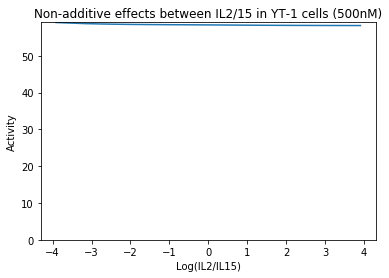

In [7]:
y,num, xaxis = solve_IL2_IL15(500.0, 50, 240.0)
f, ax = plt.subplots()
ax.plot(xaxis, y)
ax.set_xlabel('Log(IL2/IL15)')
ax.set_ylabel('Activity')
ax.set_ylim(bottom = 0)
ax.set_title('Non-additive effects between IL2/15 in YT-1 cells (500nM)')